In [2]:
from tensorflow import keras
import tensorflow
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image

In [3]:
symbols_list = ['zero','one','two','three','four','five','six','seven','eight','nine','minus','plus','equal','div','decimal','times']

In [4]:
IMAGE_SIZE = (32,32)

In [5]:
tensorflow.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
dataset_path = "./train"
train_image = []
train_label = []

for symbols_dir in os.listdir(dataset_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir(os.path.join( dataset_path, symbols_dir)):
            train_label.append(symbols_dir.split()[0])
            train_image.append(os.path.join( dataset_path, symbols_dir, image))

In [7]:
eval_path = "./eval"
test_image = []
test_label = []

for symbols_dir in os.listdir(eval_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir( os.path.join (eval_path, symbols_dir)):
            test_label.append(symbols_dir.split()[0])
            test_image.append(os.path.join( eval_path, symbols_dir, image))

In [8]:
X_train = []
X_test = []

# laoding the images from the path
for path in train_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = np.array(img)
    X_train.append(img)

for path in test_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = np.array(img)     
    X_test.append(img)

# creating numpy array from the images
X_train = np.array(X_train)
X_test = np.array(X_test)

In [9]:
# normalizing the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (7557, 32, 32, 3)
X_test shape:  (1010, 32, 32, 3)


./train\decimal\1003.jpg
decimal


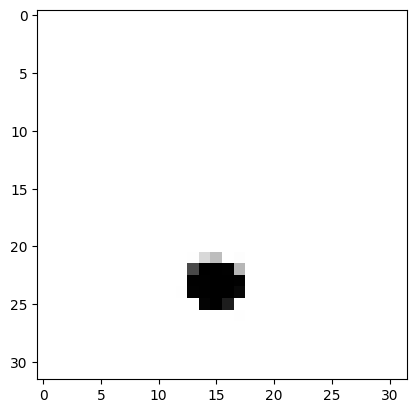

In [10]:
print(train_image[0])
print(train_label[0])
plt.imshow(X_train[0])

In [11]:
y_train = np.array([[0] * 16 for _ in range(len(train_label))])

for i, category in enumerate(train_label):
    index = symbols_list.index(category)
    y_train[i][index] = 1
y_test = np.array([[0] * 16 for _ in range(len(test_label))])

for i, category in enumerate(test_label):
    index = symbols_list.index(category)
    y_train[i][index] = 1

print(y_test.shape)
print(y_train.shape)

(1010, 16)
(7557, 16)


In [12]:
###  MODEL 

In [13]:
from keras.applications.resnet_v2 import ResNet50V2, preprocess_input, decode_predictions

In [14]:
transfer_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3))

94668760/94668760 [==============================] - 127s 1us/step


In [15]:
transfer_model.trainable = False

In [16]:
inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3))
x = transfer_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(16, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resnet50v2 (Functional)     (None, 1, 1, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 16)                32784     
                                                                 
Total params: 23,597,584
Trainable params: 32,784
Non-trainable params: 23,564,800
____________________________________________

In [18]:
model.compile(optimizer='adam', loss=keras.metrics.categorical_crossentropy, metrics=['accuracy'])

In [19]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=16
)

Epoch 1/20
473/473 [==============================] - 16s 19ms/step - loss: 2.3903 - accuracy: 0.3999
Epoch 2/20
473/473 [==============================] - 8s 17ms/step - loss: 1.9228 - accuracy: 0.5093
Epoch 3/20
473/473 [==============================] - 8s 17ms/step - loss: 1.7803 - accuracy: 0.5386
Epoch 4/20
473/473 [==============================] - 8s 17ms/step - loss: 1.7059 - accuracy: 0.5534
Epoch 5/20
473/473 [==============================] - 8s 18ms/step - loss: 1.6573 - accuracy: 0.5740
Epoch 6/20
473/473 [==============================] - 8s 18ms/step - loss: 1.6242 - accuracy: 0.5814
Epoch 7/20
473/473 [==============================] - 8s 18ms/step - loss: 1.5992 - accuracy: 0.5906
Epoch 8/20
473/473 [==============================] - 8s 17ms/step - loss: 1.5767 - accuracy: 0.5983
Epoch 9/20
473/473 [==============================] - 8s 17ms/step - loss: 1.5673 - accuracy: 0.6049
Epoch 10/20
473/473 [==============================] - 8s 17ms/step - loss: 1.5544 - accur

In [19]:
from tensorflow.keras.preprocessing import image

In [28]:
img_path = '../projekat/characters/8.png'
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)

print(symbols_list[preds.argmax(axis=1)[0]])
print(preds)

1/1 [==============================] - 0s 21ms/step
times
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
